<a href="https://colab.research.google.com/github/flaviarbatista/Assignments/blob/main/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 10: Introduction to Artificial Intelligence**
### **Name:** Flavia Batista
### **Course:** Data Analytics and Business Intelligence Analyst
### **Institution:** Willis Collegess Intelligence Analyst

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Clone the Repository

In [2]:
!git clone https://github.com/flaviarbatista/Assignments.git

Cloning into 'Assignments'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 161 (delta 27), reused 0 (delta 0), pack-reused 107 (from 2)
Receiving objects: 100% (161/161), 8.29 MiB | 11.57 MiB/s, done.
Resolving deltas: 100% (89/89), done.


# Inspect

In [3]:
!ls "/content/drive/MyDrive/Willis College/12- Introduction to Artificial Intelligence/Assignments/Lab 10"

 amazon_alexa.tsv  'Lab 10.ipynb'


#**Product: Amazon Alexa**
### **Customer Review Classification**

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- **The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.** Positive or Negative review?
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews
---



---



# **Import Libraries and Dataset**

In [4]:
print(" --- Imports necessary libraries ---\n")
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
print("Libraries imported successfully!\n")

 --- Imports necessary libraries ---

Libraries imported successfully!



In [5]:
alexa_df = pd.read_csv('/content/drive/MyDrive/Willis College/12- Introduction to Artificial Intelligence/Assignments/Lab 10/amazon_alexa.tsv', sep='\t')

In [6]:
alexa_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
alexa_df['verified_reviews']

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [8]:
positive = alexa_df[alexa_df['feedback']==1]
negative = alexa_df[alexa_df['feedback']==0]

In [9]:
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [10]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


#**Data Visualization and Clean Up**

<Axes: ylabel='count'>

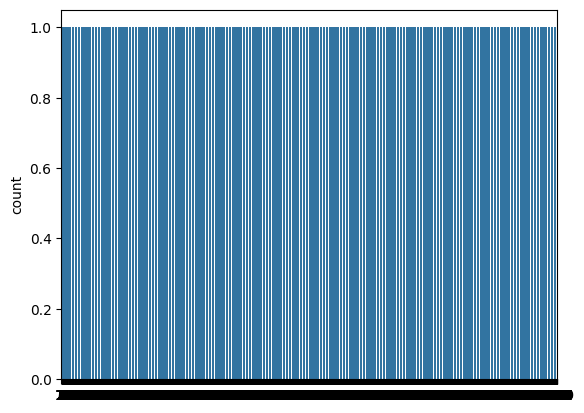

In [11]:
sns.countplot(alexa_df['feedback'], label = 'Count')

<Axes: ylabel='count'>

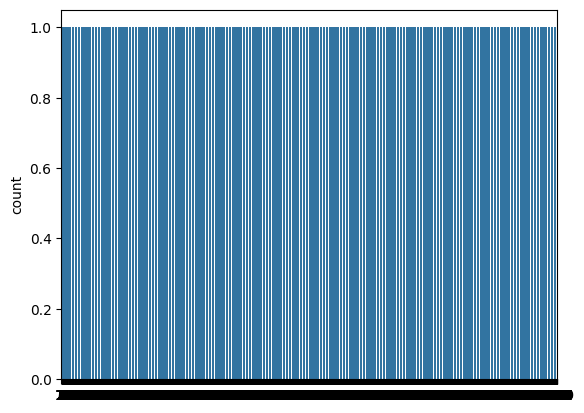

In [12]:
sns.countplot(alexa_df['rating'], label = 'Count')

<Axes: xlabel='count', ylabel='variation'>

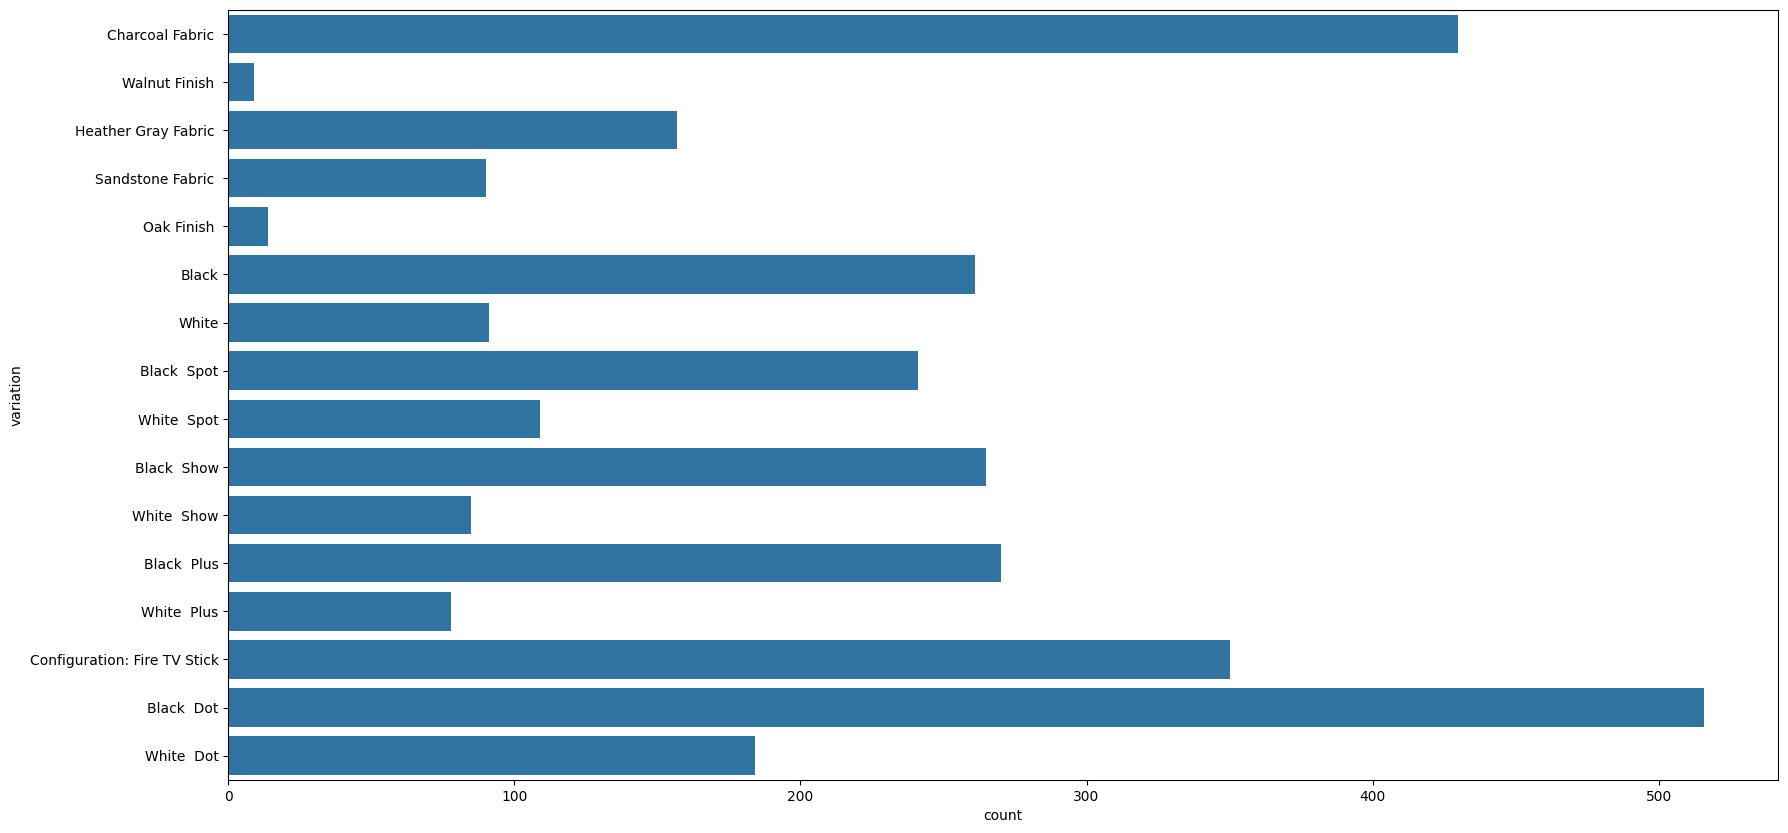

In [13]:
plt.figure(figsize = (20,10))
sns.countplot(alexa_df['variation'], label = 'Count')

/tmp/ipython-input-1063481195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y='rating', data=alexa_df, palette = 'deep')


<Axes: xlabel='variation', ylabel='rating'>

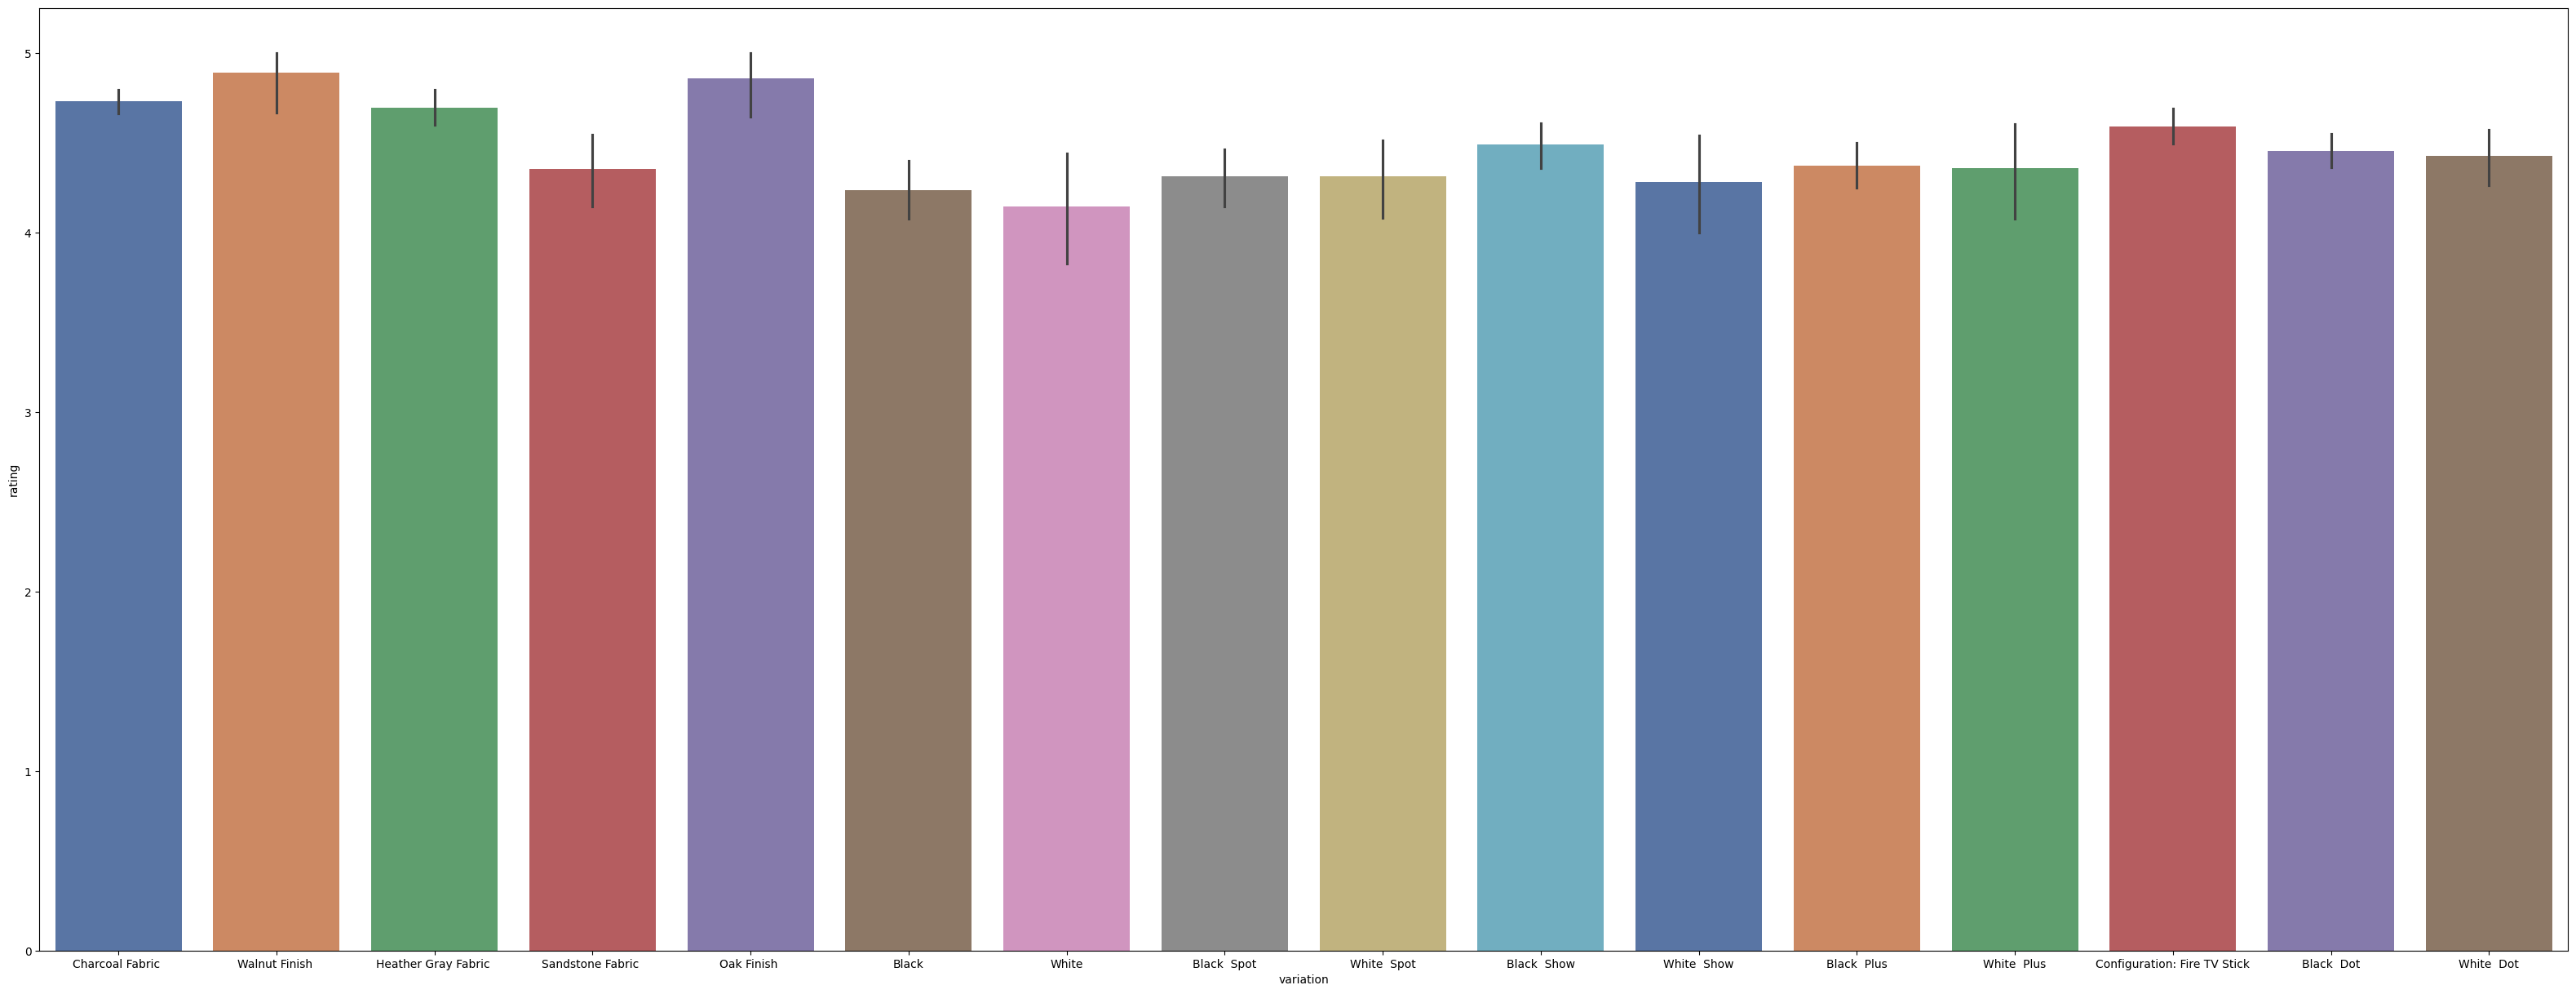

In [14]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data=alexa_df, palette = 'deep')

In [15]:
alexa_df = alexa_df.drop(['date', 'rating'], axis=1)

In [16]:
alexa_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


# **One-Hot Encoding**

Many machine learning algorithms work efficiently with numerical data. `One-hot encoding` is a common way to transform categorical text data into a format these algorithms can understand and use for tasks like classification, sentiment analysis, or text generation.

**One-hot encoding** is a technique used to **convert categorical data into a numerical format that machine learning algorithms can understand**. It creates new binary columns (0 or 1) for each unique category in the original data, with a 1 indicating the presence of that category in a particular row and 0s everywhere else.

`pd.get_dummies(...)` - This function from the pandas library is used for one-hot encoding. It converts categorical variables (like text labels or categories) into numerical format, which is essential for many machine learning algorithms.

In [17]:
variation_dummies = pd.get_dummies(alexa_df['variation'], drop_first = True)

In [18]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [19]:
# first let's drop the column
alexa_df.drop(['variation'], axis=1, inplace=True)

In [20]:
# Now let's add the encoded column again
alexa_df = pd.concat([alexa_df, variation_dummies], axis=1)

In [21]:
alexa_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,"Listening to music, searching locations, check...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,"I do love these things, i have them running my...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,Only complaint I have is that the sound qualit...,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


#**Tokenization (Count Vectorizer)**

At its core, **tokenizatio**n is the process of breaking down a piece of text into smaller units called tokens. These tokens can be words, subwords, characters, or even phrases, depending on the specific tokenization strategy you choose. Think of it like chopping up a sentence into its constituent parts to make it easier to analyze.

**Count vectorization**, also known as "bag of words," is a technique used to convert a collection of text documents into a matrix of token counts. This process creates a numerical representation of text data that can be used in machine learning algorithms.
The steps involved in count vectorization are:

Create a vocabulary of all unique words in the corpus (collection of documents).
For each document, count how many times each word from the vocabulary appears.
Represent each document as a vector of these word counts.

For example, given two simple documents:
```
Doc1: "The cat sat on the mat."
Doc2: "The dog chased the cat."
```

The vocabulary would be:
```
["The", "cat", "sat", "on", "mat", "dog", "chased"]
```
The count vectors would be:

```
Doc1: [2, 1, 1, 1, 1, 0, 0]
Doc2: [2, 1, 0, 0, 0, 1, 1]
```

In [22]:
# Quick Example of Tokenization
# Consider a list of sentences/strings below - sample_data


from sklearn.feature_extraction.text import CountVectorizer #Python Library for that does the magic

sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [23]:
# print out tokens
# print out tokens
print(vectorizer.get_feature_names_out()) # Use get_feature_names_out() instead of get_feature_names()

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [24]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [25]:
#Back to project

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
# Replace NaN values with empty strings in the 'verified_reviews' column
alexa_df['verified_reviews'] = alexa_df['verified_reviews'].fillna('')

# Proceed with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(alexa_df['verified_reviews'])

In [26]:
alexa_countvectorizer.shape

(3150, 4044)

In [27]:
type(alexa_countvectorizer)

scipy.sparse._csr.csr_matrix

In [28]:
print(vectorizer.get_feature_names_out()) # Use get_feature_names_out() instead of get_feature_names()

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [29]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
alexa_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [31]:
# Now let's concatenate them together
alexa_df = pd.concat([alexa_df, reviews], axis=1)

In [32]:
alexa_df


,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,1,False,False,False,False,True,False,False,False,False,...,0,1,0,0,0,0,0,0,0,0
4,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,1,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,1,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3148,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X = alexa_df.drop(['feedback'],axis=1)

In [34]:
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,False,False,False,False,False,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,True,False,False,False,False,False,...,0,1,0,0,0,0,0,0,0,0
4,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3148,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [35]:
Y = alexa_df['feedback']

#**Train and Test the Model**

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)

In [37]:
X.shape, Y.shape

((3150, 4059), (3150,))

In [38]:
X_train.shape, y_train.shape, X_test.shape

((2520, 4059), (2520,), (630, 4059))

In [39]:
# Any Suitable Model Algorithm can be used

In [40]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(4059,)))
model.add(tf.keras.layers.Dense(units=400, activation='relu'))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │     1,624,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,401 (6.50 MB)

 Trainable params: 1,704,401 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer = 'Adam',  loss='binary_crossentropy', metrics = ['accuracy'])

In [43]:
# Convert boolean columns in X_train and y_train to numerical (0 or 1)
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Now fit the model
epochs_hist = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9221 - loss: 0.3675
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9597 - loss: 0.1015
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9871 - loss: 0.0400
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9931 - loss: 0.0203
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9953 - loss: 0.0135
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9966 - loss: 0.0102
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9951 - loss: 0.0141
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9952 - loss: 0.0128
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9934 - loss: 0.0158
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9957 - loss: 0.0139


#**Evaluate Model**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<Axes: >

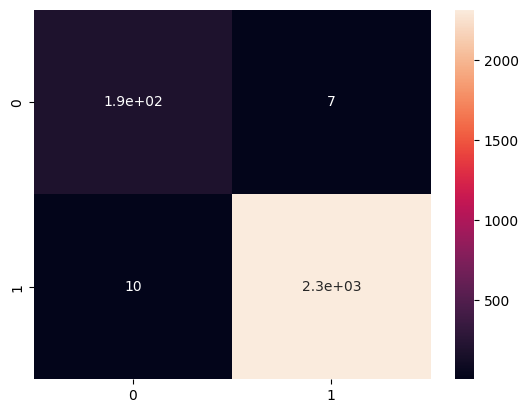

In [45]:
y_pred_train = model.predict(X_train)
y_pred_train

y_pred_train = (y_pred_train > 0.5)

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<Axes: >

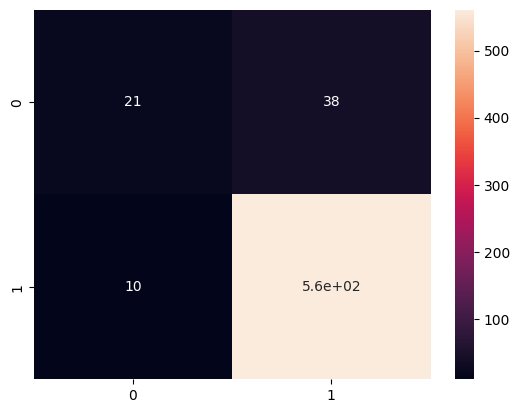

In [46]:
# Convert boolean columns in X_test to numerical (0 or 1) before prediction
X_test = X_test.astype(float)

# Now predict
y_pred_test = model.predict(X_test)
y_pred_test

y_pred_test = (y_pred_test > 0.5)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [47]:
# @title Create a Classification Report for y_test vs y_pred (You can combine both test and train)

#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test)) # remember to define y_test and y_pred appropriately.

              precision    recall  f1-score   support

           0       0.68      0.36      0.47        59
           1       0.94      0.98      0.96       571

    accuracy                           0.92       630
   macro avg       0.81      0.67      0.71       630
weighted avg       0.91      0.92      0.91       630



In [48]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss'])

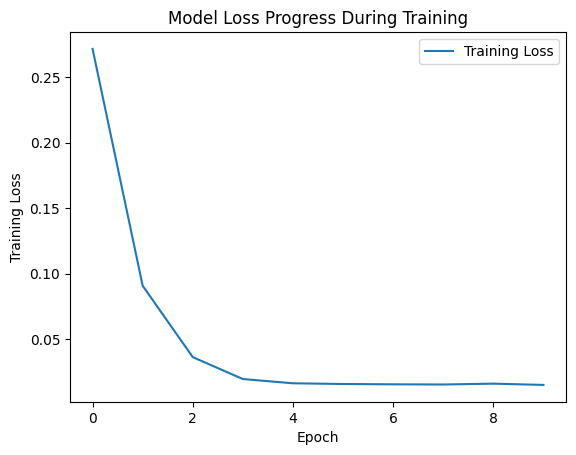

In [49]:
plt.plot(epochs_hist.history['loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

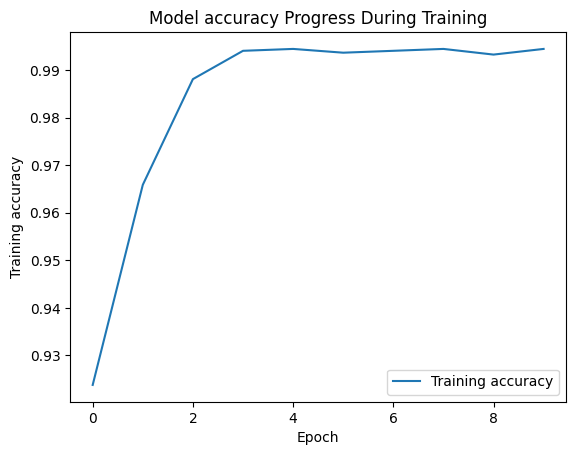

In [50]:
plt.plot(epochs_hist.history['accuracy'])

plt.title('Model accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])

**Good Classification model. This can predict if a review is a positive or negative feedback with accuracy of >99%**

In [52]:
!jupyter nbconvert --to html "Lab_10.ipynb"

[NbConvertApp] WARNING | pattern 'Lab_10.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exec